In [50]:
import numpy as np
import matplotlib.pyplot as pyplot
from NeuralNetwork import NeuralNetwork

# MNIST dataset contian 
input_nodes = 28 * 28
# Normally number of nodes in the hidden layer between # of input nodes and # of output nodes
hidden_nodes = 100
# 10 output nodes for each representation of digit
output_nodes = 10

NN = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, 0.1)

def parseLine(str):
    parsed = str.split(",");
    # the first element in the parsed array indicates the number
    target_val = int(parsed[0]);
    # convert string to float then rescale data to be (0, 1.0]
    original = np.asfarray(parsed[1:])
    scaled_data = (original / 255.0 * 0.99) + 0.01

    return target_val, scaled_data, original



In [51]:
# Read line at a time and parse the csv to train the data
with open("./train_data/mnist_train.csv", "r") as dataset:
    while True:
        line = dataset.readline()
        if not line:
            break
        
        target_val, scaled_data = parseLine(line);
        targets = np.zeros(output_nodes)
        # set the corresponding target in the target array
        targets[target_val] = 0.99
        # train with the parsed information
        NN.train(scaled_data, targets)

    dataset.close()

0.9482


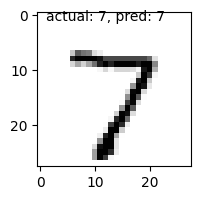

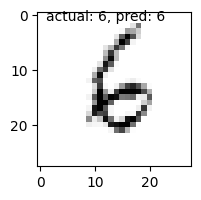

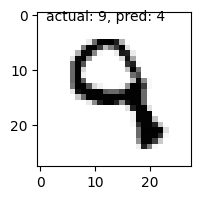

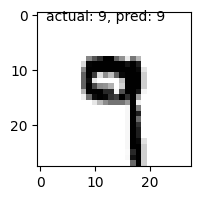

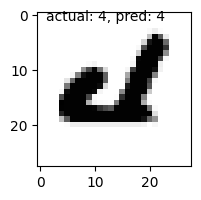

In [69]:
test_dataset = open("./test_data/mnist_test.csv", "r")

# header of csv file
line = test_dataset.readline()

correct = 0;
total = 0;
count = 0;

while True:
    line = test_dataset.readline()
    if not line:
        break

    target_val, scaled_input, original  = parseLine(line)

    outputs = NN.query(scaled_input)
    pred = [index for index, target in enumerate(outputs) if target == max(outputs)][0]
    actual = target_val

    if (count % 2000 == 0):
        pyplot.figure(count, figsize=(2,2))
        img = original.reshape((28,28))
        fig = pyplot.imshow(img, cmap="Greys", interpolation="None", aspect="equal")
        pyplot.text(1,1, f"actual: {actual}, pred: {pred}")
    
    if (pred == actual):
        correct += 1

    count = total = total + 1

accuracy = correct / total
  
print(accuracy)
